In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as m

In [221]:
df = pd.read_csv('/Users/toddhendricks/Downloads/sapd - Sheet1.csv')

In [222]:
df.head(5)
df.columns

Index(['Date of Discipline', 'Year of Discipline', 'City Year of Discipline',
       'City Quarter of Discipline', 'Officer', 'Officer Ethnicity',
       'Officer Gender', 'Hire Date', 'Years Employed', 'Job Title',
       'Salary at Year of Termination',
       'Indefinite Suspension /\nContemplated / Temporary',
       'Reason for Termination', 'Civil Service Agenda ',
       'Suspension Documents', 'Arbitration/ Settlement Documents',
       'Outcome of Termination', 'Termination Outcome',
       'Suspension or Arbitration', 'Date of Arbitration/Settlement',
       'Years Between Arbitration/Settlement',
       'Days Suspended After Reinstatement'],
      dtype='object')

In [223]:
df['Date of Discipline'] = pd.to_datetime(df['Date of Discipline']) 
df['Date of Arbitration/Settlement'] = pd.to_datetime(df['Date of Arbitration/Settlement']) 

In [224]:
re = df[df['Termination Outcome'] == 'Reinstated']
fired = df[df['Termination Outcome'] == 'Terminated']

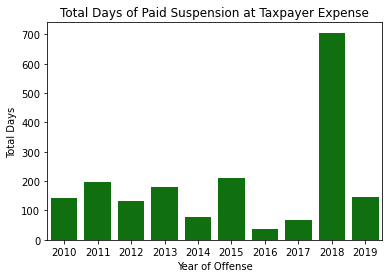

In [303]:
sns.barplot(x=re['City Year of Discipline'], y=re['Days Suspended After Reinstatement'],ci=None, color='green')
plt.title("Total Days of Paid Suspension at Taxpayer Expense")
plt.xlabel("Year of Offense")
plt.ylabel("Total Days")
plt.savefig('1.png')

In [247]:
re = re.replace('Conduct: Force (Feds)', 'Excessive Force')
re = re.replace('Conduct: Violation of Exam Rules', 'Dishonesty')
re = re.replace('Conduct: Relationship with co-workers', 'Fraternization')
re = re.replace('Conduct', 'Misconduct (Undefined)')
re = re.replace('Child sexual assault ', 'Sexual Assualt of Child')
re = re.replace('Assault (FV)', 'Excessive Force')
re = re.replace('Theft: Dog', 'Theft')
re = re.replace('Sexual Conduct', 'Sexual Harassment')
re = re.replace('Conduct: Dereliction of Duty', 'Dereliction of Duty')
re = re.replace('Conduct: Altercation', 'Excessive Force')
re = re.replace('Conduct: Vehicle Chase Violation', 'Reckless Endangerment')
re = re.replace('Threat of Revenge Pornography', 'Revenge Porn')
re = re.replace('Family Violence: Threats', 'Domestic Violence')
re = re.replace('Illegal Conduct: Criminal Mischief', 'Criminal Mischief')
re = re.replace('Family Violence: Threats', 'Domestic Violence')

In [250]:
re['Reason for Termination'].unique()

array(['Excessive Force', 'Mishandling DWI', 'Dishonesty',
       'Fraternization', 'Misconduct (Undefined)',
       'Sexual Assualt of Child', 'Theft', nan, 'DWI',
       'Sexual Harassment', 'Dereliction of Duty', 'Criminal Mischief',
       'Reckless Endangerment', 'Revenge Porn', 'Unknown',
       'Domestic Violence'], dtype=object)

In [251]:
re['reinstatement_method'] = re['Outcome of Termination'].str.replace('Reinstated: Unknown Reason', 'City Refuse to Disclose')
re['reinstatement_method'] = re['Outcome of Termination'].str.replace('Reinstated, Settlement Agreement', 'Settlement Agreement')
re['reinstatement_method'] = re['Outcome of Termination'].str.replace('Reinstated: Arbitration', 'Arbitration')
re['reinstatement_method'] = re['Outcome of Termination'].str.replace('Reinstated: Settlement Agreement Agenda', 'Settlement Agreement')

In [252]:
re.reinstatement_method = re.reinstatement_method.str.replace('Reinstated: ','')

In [254]:
re.reinstatement_method.unique()

array(['Settlement Agreement', 'Arbitration', 'Unknown Reason'],
      dtype=object)

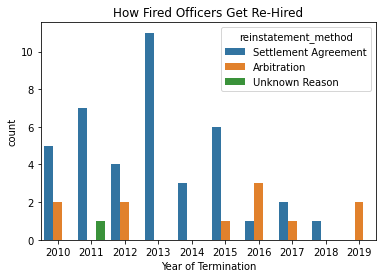

In [310]:
sns.countplot(
    data=re,
    x='Year of Discipline',
    hue='reinstatement_method'
)
plt.xlabel('Year of Termination')
plt.title('How Fired Officers Get Re-Hired')
plt.savefig('2.png')

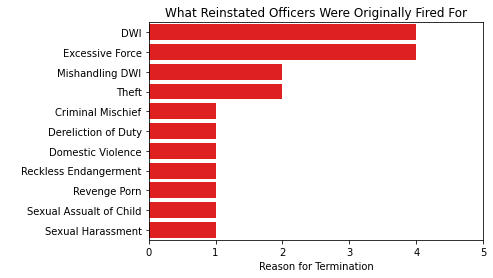

In [312]:
reasons = re.groupby(by=['Reason for Termination'])['Officer'].count().reset_index()
reasons = reasons[reasons['Reason for Termination'] != 'Misconduct (Undefined)']
reasons = reasons[reasons['Reason for Termination'] != 'Unknown']
reasons = reasons[reasons['Reason for Termination'] != 'Fraternization']
reasons = reasons[reasons['Reason for Termination'] != 'Dishonesty']
reasons = reasons.sort_values(by='Officer', ascending=False)

sns.barplot(
    x=reasons['Officer'],
    y=reasons['Reason for Termination'],
    orient='h', color='red'
)
plt.xlabel('Reason for Termination')
plt.title('What Reinstated Officers Were Originally Fired For')
plt.ylabel(' ')
plt.xticks(range(0,len(reasons['Officer'])))
plt.xlim(0,5)
plt.savefig('3.png')

In [304]:
df['daily_sal'] = 164

In [306]:
df['cost'] = df['daily_sal'] * df['Days Suspended After Reinstatement']

In [308]:
df['school'] = df['cost'] / 3

In [309]:
df['school']

0               NaN
1               NaN
2       1640.000000
3       7544.000000
4               NaN
5       6997.333333
6               NaN
7               NaN
8      16400.000000
9               NaN
10      6833.333333
11              NaN
12     10824.000000
13      1640.000000
14              NaN
15     30394.666667
16              NaN
17              NaN
18         0.000000
19              NaN
20     17384.000000
21      1640.000000
22              NaN
23              NaN
24      2460.000000
25              NaN
26      1640.000000
27              NaN
28      3280.000000
29     48216.000000
           ...     
71      2460.000000
72      6560.000000
73              NaN
74              NaN
75              NaN
76              NaN
77     38594.666667
78      2022.666667
79              NaN
80              NaN
81              NaN
82              NaN
83     10933.333333
84              NaN
85              NaN
86      4920.000000
87              NaN
88              NaN
89              NaN
